# Ejercicio 3: Regresión logística multi-clase y redes neuronales
  ##     Agustín Jofré Millet

## 1. Regresión logística multi-clase

### 1.1. Visualización de los datos

In [20]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures
from scipy.io import loadmat


data = loadmat('ex3data1.mat')

# se pueden consultar las claves con data . keys ()
y = data['y'].ravel()  # matriz aplanada (vector)
X = data['X']
print (data)
#np.place(y, y == 10, 0)

num_etiquetas = 10
reg = 0.1
#m = len(y)

print(X.shape)
print(y.flatten())

# almacena los datos leídos en X, y

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}
(5000, 400)
[10 10 10 ...  9  9  9]


(-0.5, 199.5, 19.5, -0.5)

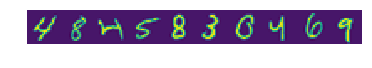

In [7]:
sample = np.random.choice(X.shape[0], 10) 
plt.imshow(X[sample, :].reshape(-1, 20).T) 
plt.axis('off')

### 1.2. Vectorización de la regresión logística

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def costFunction2(theta, X, y, l):
    hipTX = sigmoid(np.dot(X, theta))
    
    return - ((np.dot(y, np.log(hipTX).T) + np.dot(np.log(1 - hipTX).T, (1 - y))) / m) + l/(2*m) * np.sum(np.square(theta[1:]))

In [22]:
def gradientFunction2(theta, X, y, l):
    hipTX = sigmoid(np.dot(X, theta))
    thetaSinCero = np.insert(theta[1:], 0, 0)
    return (np.dot(X.T, (hipTX -y)) / m) + (l * thetaSinCero) / m

### Función de coste y gradiente
\begin{equation*}
J(\theta) = 
-\frac{1}{m} ((log(g(X\theta)))^T y + (log (1 - g(X\theta)))^T(1 - y)) + \frac {\lambda}{2m} \sum_{j=1}^n \theta_j^2
\end{equation*}

\begin{equation*}
\frac{\delta J(\theta)} {{\delta}{ \theta_j}}  = 
\frac{1}{m} X^T(g(X\theta) -y) + \frac {\lambda}{m} \theta_j
\end{equation*}



In [23]:
def costFunction(theta, X, y, l):
    m = len(y)
    hipTX = sigmoid(np.dot(X, theta))
    thetaSinCero = np.insert(theta[1:], 0, 0)
    c = - ((np.dot(y, np.log(hipTX).T) + np.dot(np.log(1 - hipTX).T, (1 - y))) / m) + l/(2*m) * np.sum(np.square(theta[1:]))
    g= (np.dot(X.T, (hipTX -y)) + l * thetaSinCero) / m
    return c,g

### 1.3. Clasificación de uno frente a todos

In [24]:
def oneVsAll (X, y , num_etiquetas , reg ) :
  
    all_theta = np.zeros((num_etiquetas, X.shape[1] + 1))
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    initial_theta = np.zeros(X.shape[1])

    for i in range(0, num_etiquetas):
        label = 10 if i == 0 else i
        result = opt.fmin_tnc(costFunction, initial_theta, args=(X,(y==label).astype(int),reg))
        print ('etiquetas =', label)
        all_theta[i, :] = result[0]
        
    return all_theta

In [25]:
all_theta = oneVsAll(X, y,num_etiquetas , reg)


etiquetas = 10
etiquetas = 1
etiquetas = 2
etiquetas = 3
etiquetas = 4
etiquetas = 5
etiquetas = 6
etiquetas = 7
etiquetas = 8
etiquetas = 9


### Predicciones:

In [26]:

def prediccion(all_theta, X):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    p = np.argmax(X.dot(all_theta.T), axis=1)
    
    p[p == 0] = 10

    return p

In [27]:

pred = prediccion(all_theta, X)
print ('Acieto de:', np.mean(pred == y) * 100)

Acieto de: 96.46000000000001


## 2. Redes neuronales
#### La red neuronal tiene la siguiente estructura:
Formada por tres capas, con 400 unidades en la primera capa (además de la primera fijada siempre a +1), 25 en la capa oculta y 10 en la capa de salida.
![Drag Racing](redn.png)

#### Cargamos theta super 1 y \theta super 2  de ex3weights.mat

In [28]:
import numpy as np
import scipy.io as sio

weights = loadmat('ex3weights.mat')
theta1 , theta2 = weights ['Theta1'] , weights ['Theta2' ] 
# Theta1 es de dimensión 25 x 401
# Theta2 es de dimensión 10 x 26

print (theta1.shape, theta2.shape)

(25, 401) (10, 26)


In [29]:
def modelo(theta1, theta2, X):
    X = np.hstack((np.ones((X.shape[0], 1)), X))#añado unos a la col 0, shape 5000,401
    a1 = sigmoid(np.dot(X, theta1.T)) #calculo a1
    a1 = np.hstack((np.ones((X.shape[0], 1)), a1)) #añado col de unos
    
    a2 = sigmoid(np.dot(a1, theta2.T))

    p = np.argmax(a2, axis=1)#índices de los valores máximos del eje 1
    p += 1 #los indices arrancan desde 1 no desde cero
    print (p)
    return p

In [30]:
p = modelo(theta1,theta2,X)
print ("Prediccion de :", np.mean(p == y) * 100) #mean devuelve el promedio de los y de la matriz

[10 10 10 ...  9  9  9]
Prediccion de : 97.52
